<a href="https://colab.research.google.com/github/neel26desai/basic_neural_networks/blob/main/neural_nw_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np

# Synthetics Data Generation

In [135]:
# defining the data
n,d = 100,3 # 100 records 3 features
#creating x, values will be between -1 and 1 and the shabe will be n,d
x = np.random.uniform(-1, 1, (n, d))
#creating weights that allows us to ge the y_true values
weights_true = np.array([[5,3,1],]).T
bias_true = np.array([1])

#creating a euqation for out y_true
y_true = (x**3) @ weights_true + (x**2) @ weights_true + x @ weights_true +bias_true
#TODO : adding the tensorflow implementation for  matrix multiplication
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')



x: (100, 3), weights: (3, 1), bias: (1,), y: (100, 1)


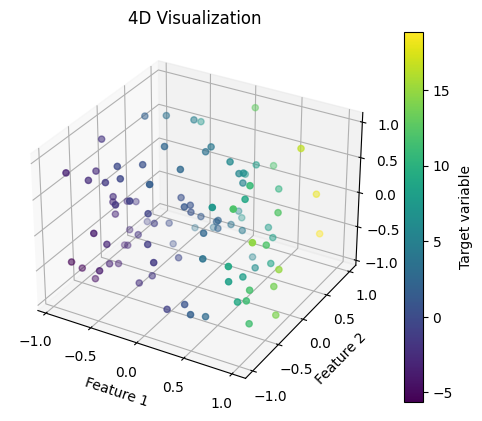

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#defining function for visualizaing the data
def visualize_4d_data(x, y_true):
    """
    Visualizes 4D data using a 3D scatter plot with color representing the fourth dimension.

    Args:
    x (numpy.ndarray): Input features with shape (n, 3).
    y_true (numpy.ndarray): Target variable with shape (n, 1).
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true.ravel(), cmap='viridis')
    plt.colorbar(scatter, label='Target variable')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title('4D Visualization')
    plt.show()

# Example usage
visualize_4d_data(x, y_true)

# Fowards Propogation

We'll be writing only the code needed for forward propogation

In [137]:
#writinbg base cases necessary for foward propogation
class LinearLayer:
  '''
  Instane of this class will be used for creating layers
  '''
  def __init__(self,input_dim, output_dim):
    self.input_dim = input_dim
    self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2 / input_dim)
    self.bias = 0.0

  def __call__(self, x):
    return np.dot(x, self.weights) + self.bias

  def backward(self, x, grad_output):
    pass

class ReLu:
  def __call__(self, x):
    self.x = x
    return np.maximum(0, self.x)

  def backward(self, x, grad_output):
    pass

class NeuralNetwork:
  def __init__(self, input_dim, hidden_dim, output_dim):
    #simple one hidden layer architecture for testing the
    self.layers = [
      LinearLayer(input_dim, hidden_dim),
      ReLu(),
      LinearLayer(hidden_dim, output_dim)
    ]

  def forward(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

In [138]:
model = NeuralNetwork(input_dim=3, hidden_dim=3, output_dim=1)
y_pred = model.forward(x)
assert y_pred.shape == y_true.shape, "Shape of y_pred and y_true should be the same"

In [139]:
def plot_function_and_predictions(x, y_true, y_pred, output_dim=0):
    """
    Plots the underlying function and the predicted function for a specific output dimension.

    Args:
    x (numpy.ndarray): Input features with shape (n, 3).
    y_true (numpy.ndarray): True target values with shape (n, 2).
    y_pred (numpy.ndarray): Predicted target values with shape (n, 2).
    output_dim (int): The output dimension to visualize (0 or 1).
    """
    fig = plt.figure(figsize=(12, 6))

    # Plot the true values
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x[:, 0], x[:, 1], y_true[:, output_dim], c='b', marker='o', label='True')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel(f'Y{output_dim + 1}')
    ax1.set_title('Underlying Function')

    # Plot the predicted values
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x[:, 0], x[:, 1], y_pred[:, output_dim], c='r', marker='^', label='Predicted')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel(f'Y{output_dim + 1}')
    ax2.set_title('Predicted Function')

    plt.legend()
    plt.show()

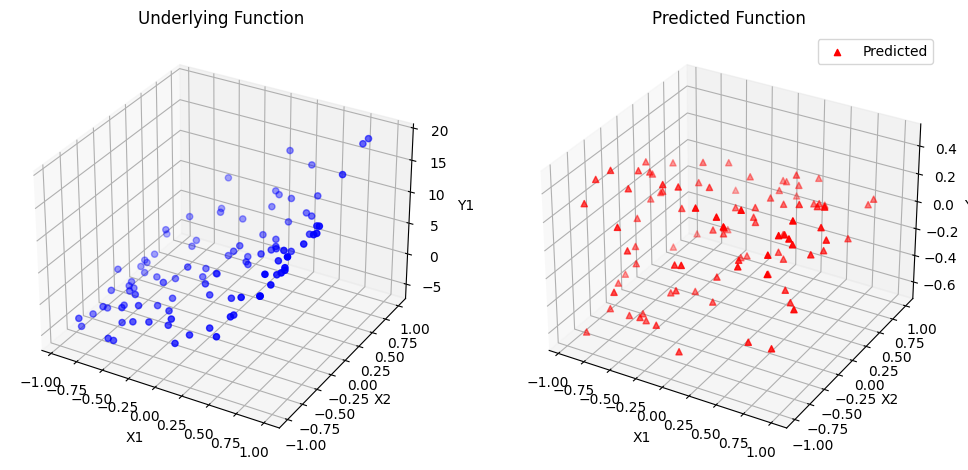

In [140]:
plot_function_and_predictions(x, y_true, y_pred, output_dim=0)

#Cost Function -  MSE

Integrating Cost function  cauclation at the end of forward propogation

In [141]:
x.shape

(100, 3)

In [142]:
from re import S
class MSELoss:
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return np.mean((y_pred - y_true) ** 2)

    def backward(self):
        return 2 * (self.y_pred - self.y_true) / self.y_true.size

class LinearLayer:
  '''
  Instane of this class will be used for creating layers
  '''
  def __init__(self,input_dim, output_dim):
    self.input_dim = input_dim
    self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2 / input_dim)
    self.bias = 0.0

  def __call__(self, x):
    return np.dot(x, self.weights) + self.bias

  def backward(self, x, grad_output):
    pass

class ReLu:
  def __int_(self):
    self.x = None

  def __call__(self, x):
    self.x = x
    return np.maximum(0, x)

  def backward(self, x, grad_output):
    pass

class NeuralNetwork:
  def __init__(self, input_dim, hidden_dim, output_dim):
    self.layers = [
      LinearLayer(input_dim, hidden_dim),
      ReLu(),
      LinearLayer(hidden_dim, output_dim)
    ]
    self.loss = MSELoss()

  def forward(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def compute_loss(self, y_pred, y_true):
    return self.loss.forward(y_pred, y_true)

In [143]:
model = NeuralNetwork(input_dim=3, hidden_dim=3, output_dim=1)
y_pred = model.forward(x)
#compute loss
loss = model.compute_loss(y_pred, y_true)

In [144]:
loss

44.27141214587196

# Backrpop
Integrating forward prop, , loss calculation , back prop with graident descent. An d training logic with number of epochs.

In [145]:
class MSELoss:
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return np.mean((y_pred - y_true) ** 2)

    def backward(self):
        return 2 * (self.y_pred - self.y_true) / self.y_true.size


class ReLu:
    def __init__(self):
        self.x = None

    def __call__(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, grad_output):
        grad_input = grad_output * (self.x > 0)
        return grad_input



class LinearLayer:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2 / input_dim)
        self.bias = np.zeros(output_dim)

    def __call__(self, x):
        self.x = x
        return np.dot(x, self.weights) + self.bias

    def backward(self, grad_output):
        # we degine the value of grad in terms of forward prop output for this layer
        grad_input = np.dot(grad_output, self.weights.T)
        grad_weights = np.dot(self.x.T, grad_output)
        grad_bias = np.sum(grad_output, axis=0)
        return grad_input, grad_weights, grad_bias

    def update(self, lr, grad_weights, grad_bias):
        self.weights -= lr * grad_weights
        self.bias -= lr * grad_bias

class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.layers = [
            LinearLayer(input_dim, hidden_dim),
            ReLu(),
            LinearLayer(hidden_dim, hidden_dim),
            ReLu(),
            LinearLayer(hidden_dim, output_dim)
        ]
        self.loss = MSELoss()

    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        # for each layer compute weight and input aand thie output will act as an input for the next later
        for layer in self.layers:
            x = layer(x)
        # the output of the final later will be out prediction
        return x

    def backward(self, grad_output):
      #from the last layer to the first we calculate the the derivatvive of each and back prop the gadient
        for layer in reversed(self.layers):
            if isinstance(layer, LinearLayer):
                grad_output, grad_weights, grad_bias = layer.backward(grad_output)
                layer.grad_weights = grad_weights
                layer.grad_bias = grad_bias
            elif isinstance(layer, ReLu):
                grad_output = layer.backward(grad_output)

        return grad_output

    # update weights at each layer
    def update(self, lr):
        for layer in self.layers:
            if isinstance(layer, LinearLayer):
                layer.update(lr, layer.grad_weights, layer.grad_bias)

def fit(x: np.ndarray, y: np.ndarray, model: NeuralNetwork, loss: MSELoss, lr: float, num_epochs: int):
    loss_history = []
    for epoch in range(num_epochs):
        y_pred = model(x)
        loss_value = loss.forward(y_pred, y)
        loss_history.append(loss_value)
        print(f'Epoch {epoch + 1}, loss {loss_value}')
        #firs is y_pred with loss function
        #calculatea the derivative and gradient for weights away from the end
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        #update weights
        model.update(lr)
    return loss_history


In [154]:

# Create a neural network model
nn = NeuralNetwork(input_dim=3, hidden_dim=3, output_dim=1)

# Define the loss
loss = MSELoss()

# Fit the model
loss_history = fit(x, y_true, model=nn, loss=loss, lr=0.01, num_epochs=100)


Epoch 1, loss 55.05678665414805
Epoch 2, loss 50.962191423503064
Epoch 3, loss 48.6203462752211
Epoch 4, loss 46.99152008952473
Epoch 5, loss 45.819216973532875
Epoch 6, loss 44.86118741716034
Epoch 7, loss 44.026969673690644
Epoch 8, loss 43.28726633842537
Epoch 9, loss 42.627166428976636
Epoch 10, loss 42.01905847112165
Epoch 11, loss 41.431311657321494
Epoch 12, loss 40.862844132847464
Epoch 13, loss 40.32859511536145
Epoch 14, loss 39.821485745256425
Epoch 15, loss 39.326772405794415
Epoch 16, loss 38.83531555601801
Epoch 17, loss 38.34335645012745
Epoch 18, loss 37.85685403037578
Epoch 19, loss 37.37131462141361
Epoch 20, loss 36.87631130170951
Epoch 21, loss 36.372775319462704
Epoch 22, loss 35.86971175260174
Epoch 23, loss 35.36041744277705
Epoch 24, loss 34.83955905869532
Epoch 25, loss 34.307637210320024
Epoch 26, loss 33.763243863044245
Epoch 27, loss 33.20437984061874
Epoch 28, loss 32.62985134653929
Epoch 29, loss 32.0406447768763
Epoch 30, loss 31.435779984517236
Epoch 31,

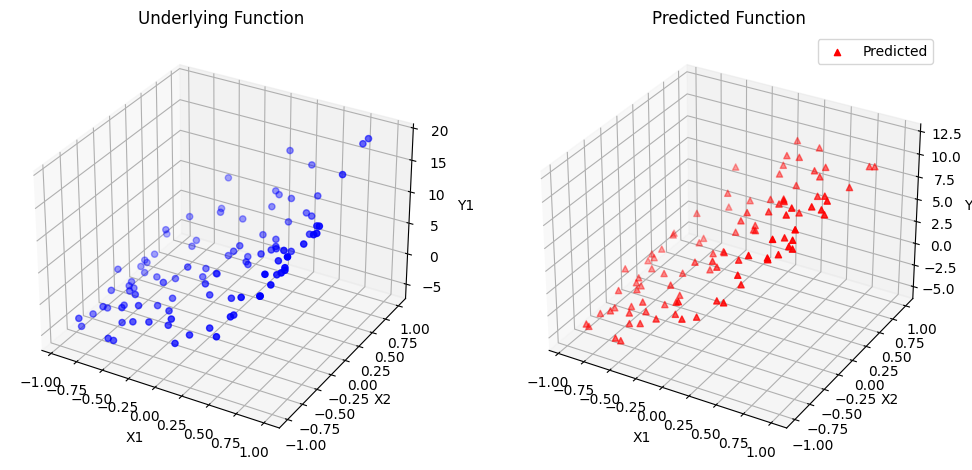

In [155]:
#plotting the difference between real distribution and predicted distribution
y_pred = nn(x)
plot_function_and_predictions(x, y_true, y_pred, output_dim=0)

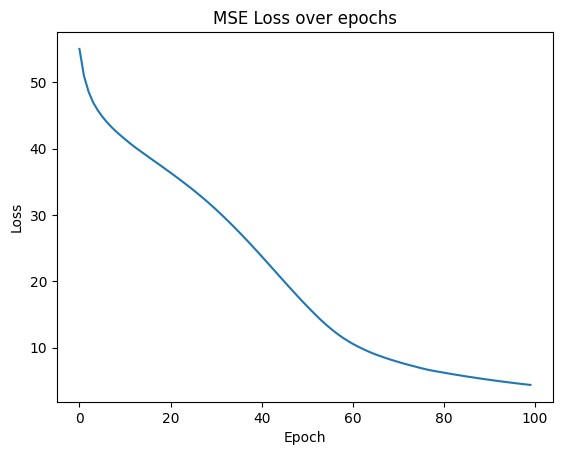

In [156]:
#plot the mse value over each epoch
plt.plot(loss_history)
plt.title('MSE Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()